<a href="https://colab.research.google.com/github/MansourMhz/MansourMhz/blob/main/24081400_20_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/MasterThesis/xauusd.csv')

In [ ]:
type(dataset)

dataset.head(5)

dataset.shape

dataset.shape[0]

dataset.shape[1]

dataset.shape[0]*0.70

num_train = int(dataset.shape[0]*0.70)
num_train

1015

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
training_set = dataset.iloc[0:num_train,1].values #open iloc = selection from rows and columns
training_set

array([1240.49, 1231.44, 1239.49, ..., 1593.43, 1577.24, 1552.94])

In [ ]:
training_set.shape


(1015,)

In [ ]:
testing_set = dataset.iloc[num_train:,1].values


In [ ]:
testing_set

testing_set.shape

from sklearn.preprocessing import MinMaxScaler
#class MinMaxScaler

In [ ]:
training_set[0:5].reshape(-1,1)#

array([[1240.49],
       [1231.44],
       [1239.49],
       [1260.2 ],
       [1264.23]])

In [ ]:
type(training_set)

sc = MinMaxScaler(feature_range=(0,1)) #oop



In [ ]:
training_set[0:5]



array([1240.49, 1231.44, 1239.49, 1260.2 , 1264.23])

In [ ]:
training_set.reshape(-1,1)

array([[1240.49],
       [1231.44],
       [1239.49],
       ...,
       [1593.43],
       [1577.24],
       [1552.94]])

In [ ]:


training_set_scaled = sc.fit_transform(training_set.reshape(-1,1))

testing_set_scaled = sc.fit_transform(testing_set.reshape(-1,1))

type(training_set_scaled)

numpy.ndarray

In [ ]:
timestep = 60
X_train =[]
Y_train =[]

len(training_set)

training_set_scaled.shape


(1015, 1)

In [ ]:
for i in range(timestep,len(training_set)): # define Time step
    X_train.append(training_set_scaled[i-timestep:i,0]) #
    Y_train.append(training_set_scaled[i,0])


In [ ]:
#training_set_scaled[60-60:60,0] #X_train =0-59  ---Y_train=60

#training_set_scaled[61-60:61,0].shape #1-61 ---61

#training_set_scaled[62-60:62,0].shape #2-62 ---62

#training_set_scaled[63-60:63,0].shape #3-63 ---63

(60,)

In [ ]:
type(X_train)


numpy.ndarray

In [ ]:

x_train = np.array(X_train)

x_train = np.array(X_train)
y_train = np.array(Y_train)


In [ ]:
type(y_train)

y_train.shape

x_train.shape

(955, 60)

In [ ]:
X_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

X_train.shape

Y_train = np.reshape(y_train,(y_train.shape[0],1))

Y_train.shape

X_test = []
Y_test =[]

In [ ]:
for i in range(timestep,len(testing_set)):
    X_test.append(testing_set_scaled[i-timestep:i,0])
    Y_test.append(testing_set_scaled[i,0])

In [ ]:
x_test = np.array(X_test)
y_test = np.array(Y_test)

X_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

Y_test = np.reshape(y_test,(y_test.shape[0],1))

#modeling
X_train
Y_train
#testing
X_test
Y_test

x_train = torch.from_numpy(X_train).type(torch.Tensor)

x_train.shape

type(x_train)

y_train = torch.from_numpy(Y_train).type(torch.Tensor)

x_test = torch.from_numpy(X_test).type(torch.Tensor)

y_test = torch.from_numpy(Y_test).type(torch.Tensor)

x_train
y_train
x_test
y_test

x_train[5].shape

torch.Size([60, 1])

In [ ]:
input_dim = 1 #  60 lstm  1 day
hidden_dim = 32
num_layers = 2
output_dim = 1 # 60 lstm 1 day

In [ ]:
class MyLSTM(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, num_layers,output_dim):
        super(MyLSTM,self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = torch.nn.LSTM(input_dim, hidden_dim,num_layers, batch_first = True) #1 -- 32

        self.fc = torch.nn.Linear(hidden_dim, output_dim) #32 --- 1

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()   
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm (x, (h0.detach(),c0.detach()))
        out = self.fc(out[:,-1,:]) # black hidd feature

        return out


In [ ]:
model = MyLSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

model

loss_fn = torch.nn.MSELoss()

params=model.parameters()
optimizer = torch.optim.Adam(params, lr=0.01)

#train model

num_epoch = 100
listLoss = np.zeros(num_epoch)

In [ ]:
for t in range(num_epoch):

    y_train_pred = model(x_train) # forward(self,x) inputs
    loss = loss_fn(y_train_pred , y_train) #loss
    listLoss[t] = loss.item() #save loss in list
    #print("epoch:",t,  "loss", loss.item()) #print lossepoch
    optimizer.zero_grad() #
    loss.backward() #
    optimizer.step() # update



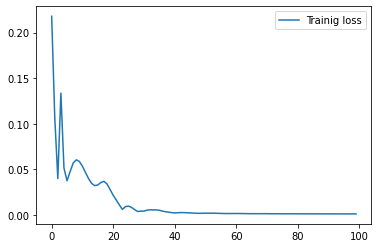

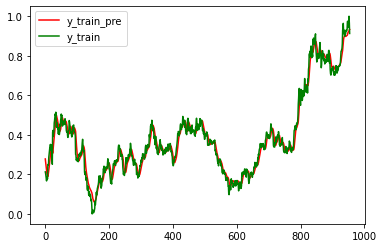

In [ ]:
plt.plot(listLoss, label ="Trainig loss")
plt.legend()
plt.show()

plt.plot(y_train_pred.detach().numpy(), label ="y_train_pre", color ='red')
plt.plot(y_train.detach().numpy(), label ="y_train", color ='green')
plt.legend()
plt.show()



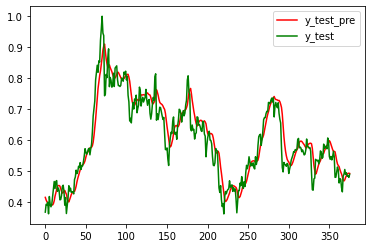

numpy.ndarray

In [ ]:
from sklearn.metrics import r2_score #regression  #

# train evaluation
r2_score = r2_score(y_train.detach().numpy(), y_train_pred.detach().numpy())

r2_score

y_test_pred = model(x_test)

plt.plot(y_test_pred.detach().numpy(), label ="y_test_pre", color ='red')
plt.plot(y_test.detach().numpy(), label ="y_test", color ='green')
plt.legend()
plt.show()

y_test.shape

y_test_pred.shape

y_test1=y_test.detach().numpy()

np.array(y_test1)

type(y_test1)

y_test_pred1=y_test_pred.detach().numpy()

type(y_test_pred1)